In [1]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

fashion_mnist = fetch_openml('Fashion-MNIST', version=1,cache=True,parser='auto')

X, y = fashion_mnist["data"], fashion_mnist["target"]

X_train, X_temp, y_train, y_temp = train_test_split(X, y, train_size=50000)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=10000)


# Random Forest
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

# Extra-Trees
et_clf = ExtraTreesClassifier()
et_clf.fit(X_train, y_train)

# SVM
svm_clf = SVC(probability=True)
svm_clf.fit(X_train, y_train)

# 輸出單個模型的準確率
print("RandomForest 驗證集準確率:", accuracy_score(y_val, rf_clf.predict(X_val)))
print("ExtraTrees   驗證集準確率:", accuracy_score(y_val, et_clf.predict(X_val)))
print("SVM          驗證集準確率:", accuracy_score(y_val, svm_clf.predict(X_val)))
# 輸出單個模型的準確率
print("RandomForest 測試集準確率:", accuracy_score(y_test, rf_clf.predict(X_test)))
print("ExtraTrees   測試集準確率:", accuracy_score(y_test, et_clf.predict(X_test)))
print("SVM          測試集準確率:", accuracy_score(y_test, svm_clf.predict(X_test)))

# Soft Voting
voting_clf = VotingClassifier(
    estimators=[('random_forest', rf_clf), ('extra_trees', et_clf), ('svm', svm_clf)],
    voting='soft'
)


voting_clf.fit(X_train, y_train)


voting_pred_val = voting_clf.predict(X_val)
print("Soft Voting 驗證集準確率:", accuracy_score(y_val, voting_pred_val))


voting_pred_test = voting_clf.predict(X_test)
print("Soft Voting 測試集準確率:", accuracy_score(y_test, voting_pred_test))


RandomForest 驗證集準確率: 0.8783
ExtraTrees   驗證集準確率: 0.8812
SVM          驗證集準確率: 0.8898
RandomForest 測試集準確率: 0.8875
ExtraTrees   測試集準確率: 0.8849
SVM          測試集準確率: 0.8925
Soft Voting 驗證集準確率: 0.8913
Soft Voting 測試集準確率: 0.8986


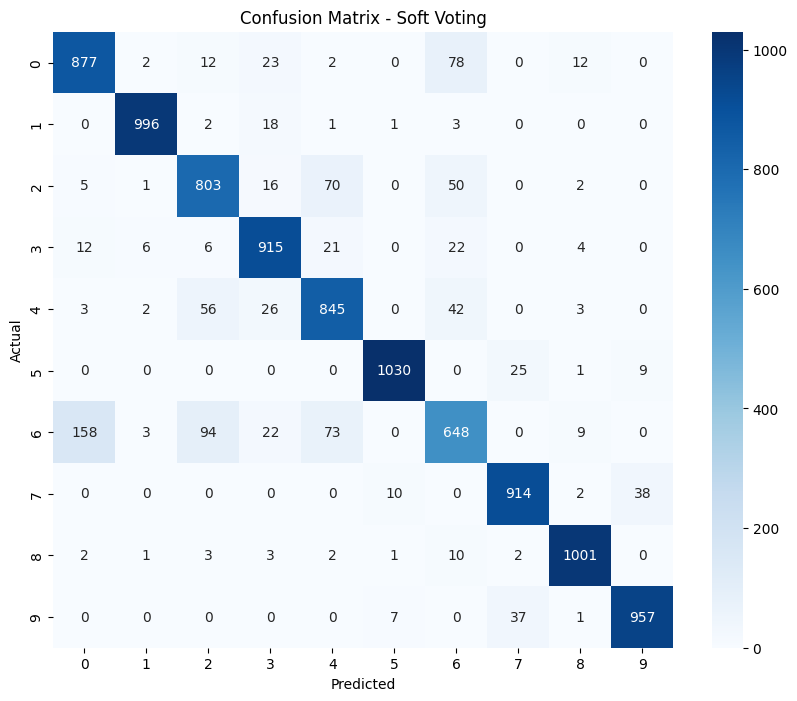

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

# 預測集合集
voting_pred_test = voting_clf.predict(X_test)

# 混淆矩陣
cm = confusion_matrix(y_test, voting_pred_test)

# 可視化混淆矩陣
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix - Soft Voting')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()